Generate two clusters of data points with100 points each (so that the total data size isn= 200), by sampling from Gaussiandistributions centered at(0.5,0.5)and(−0.5,−0.5). Call the data pointsxi, and labelthem asyi=±1depending on which cluster they originated from. 

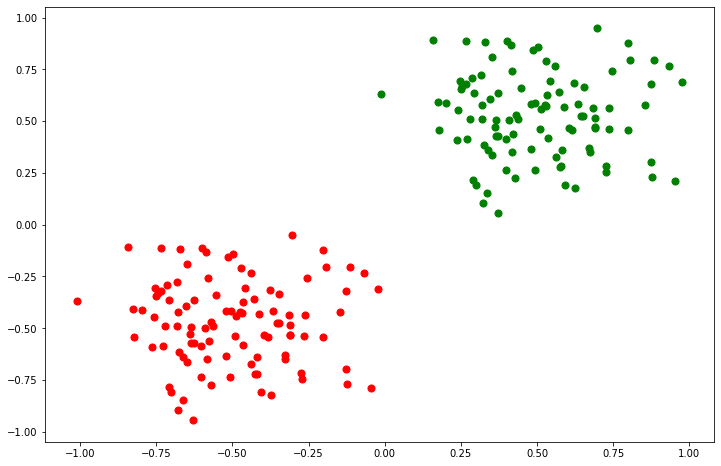

In [133]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

X1, y1 = make_blobs(n_samples=100, centers=[(-0.5, -0.5)], cluster_std=0.2, random_state=0)
X2, y2 = make_blobs(n_samples=100, centers=[(0.5, 0.5)], cluster_std=0.2, random_state=0)
# Visualizing the data
plt.figure(figsize = (12, 8))
plt.scatter(X1[:, 0], X1[:, 1], s=50,color='red');
plt.scatter(X2[:, 0], X2[:, 1], s=50,color='green');


In [0]:
y2_1 = np.ones(y2.shape)

X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2_1))

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
y = np.reshape(y,(y.shape[0],1))

data = np.append(X, y, axis = 1)
np.random.shuffle(data)
X = data[:,0:3]
y = data[:,3:4]
y = np.reshape(y,(y.shape[0],))

4b

The weights using Gradient Descent are: 

[30.24230495 31.68407961]


Text(0, 0.5, 'Predictions loss function')

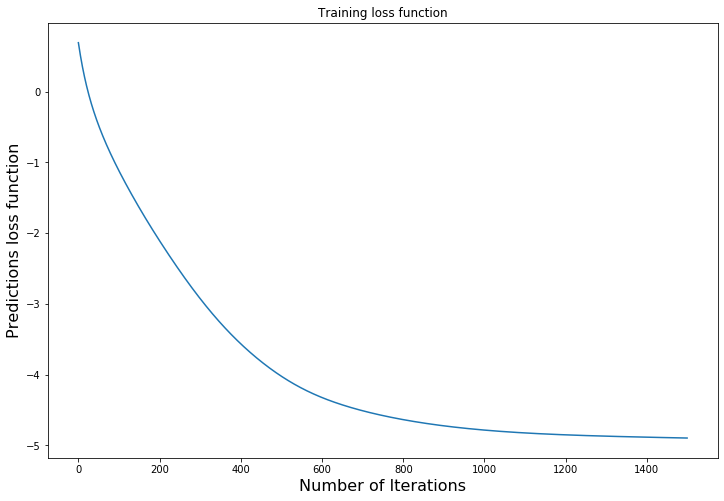

In [140]:
n = df.shape[0]
L_w = 0
e = math.e


epsilon = 1e-5
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def delta_Jw(X,y,h):
    return np.dot(X.T, (h - y)) / y.size


def error_fn_gd(y,h):
    #return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return  - (1/200)*(np.sum(y * np.log(h+epsilon) + (1 - y) * np.log(1 - h+epsilon)))



def LR_GD(X,Y,lr,T):
    Err_history =   np.zeros(T)
    w           =   np.zeros(dim)
    #m = len(Y)
    training_loss = []
    for i in range(T):
        z   =   np.dot(X,w)
        h   =   sigmoid(z)
        w   =   w - lr*delta_Jw(X,Y,h)
        training_loss.append(error_fn_gd(Y,h))
    return w, training_loss

X   =   df[['x1','x2']]
Y   =   df['y']
#Y   =   Y.values.reshape(200,1)

T = 1500
lr = .09
weight_gd, error = LR_GD(X, Y, lr, T)
 
print("The weights using Gradient Descent are: \n")
print(weight_gd) 
plt.figure(figsize = (12, 8))
plt.plot(error)
plt.title("Training loss function")
plt.xlabel('Number of Iterations', fontsize=16)
plt.ylabel('Predictions loss function', fontsize=16) 


4 c. Similarly, for SGD 






In [0]:
def stochasticGD(X, y, w, alpha, Num_iters):
  num_epochs = 10

  for j in range(Num_iters):
    pred = 0.0
    m = len(y)
    indices = np.random.permutation(m)
    X = X[indices]
    y = y[indices]
    for i in range(0,m,num_epochs):
      X_train = X[i:i+num_epochs]
      y_train = y[i:i+num_epochs]
      f = fxFunction(X_train,w)
      w = w - ((alpha) * (np.dot(X_train.T, (f - y_train)) / y_train.shape[0]))
      f = fxFunction(X_train,w)
      pred += loss(f,y_train)
    plt.plot(j,pred,color='blue', marker='o')

  plt.grid()
  plt.xlabel('Number of Iterations', fontsize=16)
  plt.ylabel('Predictions loss function', fontsize=16) 
  return w

In [0]:
def fxFunction(X,w):
    g = np.dot(X,w);
    f =  1 / ( 1 + np.exp(-g));
    return f 

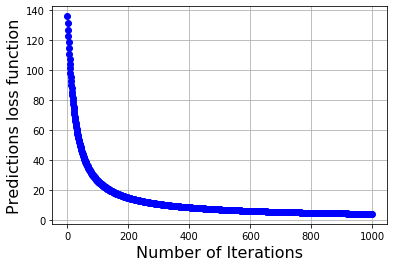

In [137]:
w = np.zeros(X.shape[1])
f = fxFunction(X,w);
alpha = 0.01
num =1000
w_sgd = stochasticGD(X, y, w, alpha, num);

4 d

Text(0.5, 1.0, 'Predicted labels using GD')

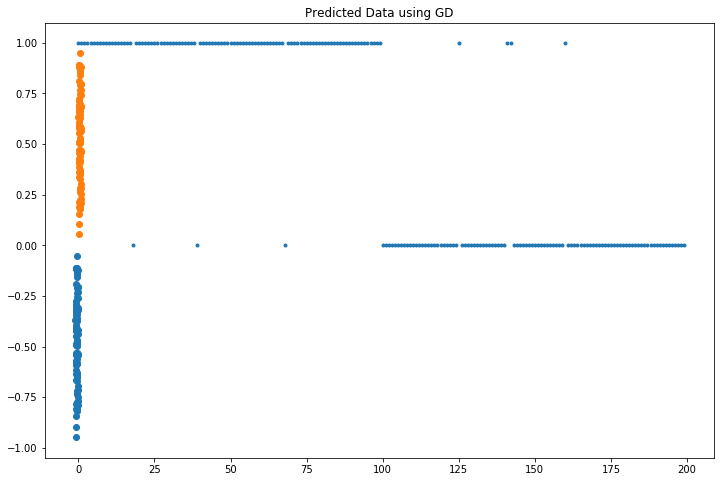

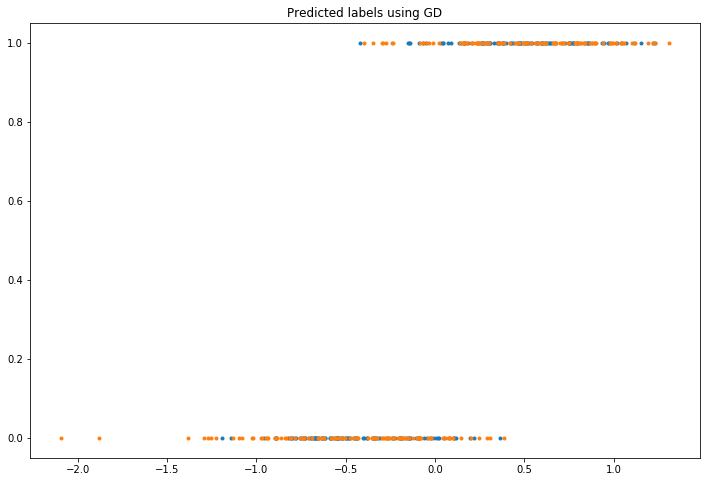

In [144]:
y_pred_gd = np.round(fxFunction(X,weight_gd))
plt.figure(figsize = (12, 8))
plt.scatter(X1[:, 0], X1[:, 1]);
plt.scatter(X2[:, 0], X2[:, 1]);
plt.plot(y_pred_gd,'.')
plt.title("Predicted Data using GD")
plt.figure(figsize = (12, 8))
plt.plot(X, y_pred_gd,'.')
plt.title("Predicted labels using GD")

Text(0.5, 1.0, 'Predicted labels using GD')

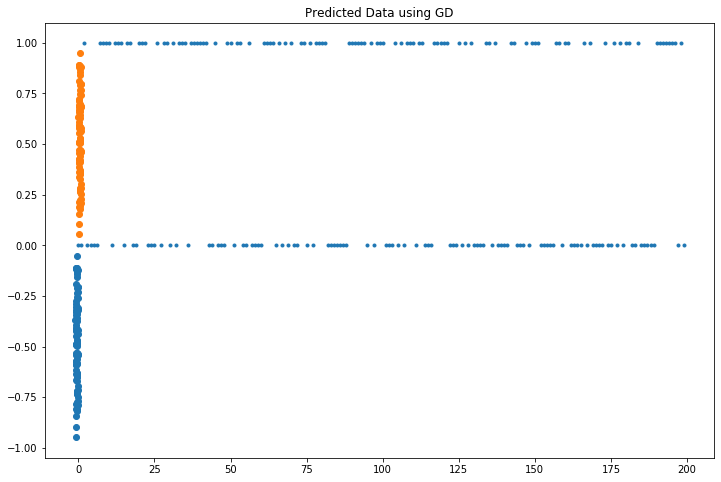

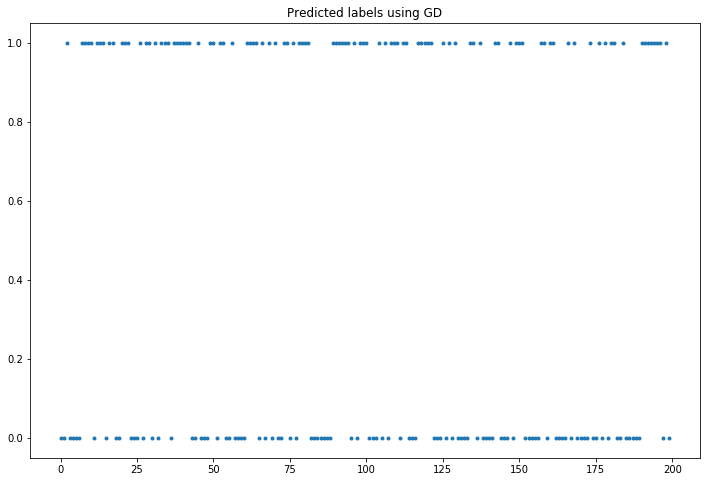

In [139]:
y_pred_sgd = np.round(fxFunction(X,w_sgd))
plt.figure(figsize = (12, 8))
plt.scatter(X1[:, 0], X1[:, 1]);
plt.scatter(X2[:, 0], X2[:, 1]);
plt.plot(y_pred_sgd,'.')
plt.title("Predicted Data using GD")
plt.figure(figsize = (12, 8))
plt.plot(y_pred_sgd,'.')
plt.title("Predicted labels using GD")